In this assignment, students will be using the K-nearest neighbors algorithm to predict how many points NBA players scored in the 2013-2014 season.
A look at the data

Before we dive into the algorithm, let’s take a look at our data. Each row in the data contains information on how a player performed in the 2013-2014 NBA season.

Download 'nba_2013.csv' file from this link:
https://www.dropbox.com/s/b3nv38jjo5dxcl6/nba_2013.csv?dl=0

Here are some selected columns from the data:\
player - name of the player\
pos - the position of the player\
g - number of games the player was in\
gs - number of games the player started\
pts - total points the player scored\
There are many more columns in the data, mostly containing information about average player game performance over the course of the season. See this site for an explanation of the rest of them. We can read our dataset in and figure out which columns are present:\
import pandas\
with open("nba_2013.csv", 'r') as csvfile:\
nba = pandas.read_csv(csvfile)

## Load the libraries and the dataset

In [1]:
import pandas as pd 
import numpy as np
with open("nba_2013.csv", 'r') as csvfile:
    df = pd.read_csv(csvfile)

df.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [2]:
print(df.shape)
print(df.columns)

(481, 31)
Index(['player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts', 'season', 'season_end'],
      dtype='object')


## Feature Engineering-Taking care of missing values

In [3]:
features_nan=[feature for feature in df.columns if df[feature].isnull().sum()>0]

for feature in features_nan:
    print(feature, df[feature].isnull().sum())

fg. 2
x3p. 67
x2p. 3
efg. 2
ft. 20


In [4]:
df["fg."].fillna(df["fg."].mean(),inplace=True)
df["x2p."].fillna(df["x2p."].mean(),inplace=True)
df["efg."].fillna(df["efg."].mean(),inplace=True)
df["x3p."].fillna(df["x3p."].mean(),inplace=True)
df["ft."].fillna(df["ft."].mean(),inplace=True)

In [5]:
features_nan=[feature for feature in df.columns if df[feature].isnull().sum()>0]

for feature in features_nan:
    print(feature, df[feature].isnull().sum())

In [6]:
df.dtypes

player           object
pos              object
age               int64
bref_team_id     object
g                 int64
gs                int64
mp                int64
fg                int64
fga               int64
fg.             float64
x3p               int64
x3pa              int64
x3p.            float64
x2p               int64
x2pa              int64
x2p.            float64
efg.            float64
ft                int64
fta               int64
ft.             float64
orb               int64
drb               int64
trb               int64
ast               int64
stl               int64
blk               int64
tov               int64
pf                int64
pts               int64
season           object
season_end        int64
dtype: object

In [7]:
df[["player", "pos", "bref_team_id", "season"]].head()

,player,pos,bref_team_id,season
0,Quincy Acy,SF,TOT,2013-2014
1,Steven Adams,C,OKC,2013-2014
2,Jeff Adrien,PF,TOT,2013-2014
3,Arron Afflalo,SG,ORL,2013-2014
4,Alexis Ajinca,C,NOP,2013-2014


In [8]:
df.drop(labels=["player","pos","bref_team_id","season"], axis=1, inplace=True)#no need for these columns
print(df.shape)

(481, 27)


In [9]:
y=df.pts.values
X=df.copy()
X.drop(labels=["pts"], axis=1, inplace=True)
X.values

array([[  23.,   63.,    0., ...,   30.,  122., 2013.],
       [  20.,   81.,   20., ...,   71.,  203., 2013.],
       [  27.,   53.,   12., ...,   39.,  108., 2013.],
       ...,
       [  25.,   79.,   78., ...,  165.,  213., 2013.],
       [  21.,   82.,    3., ...,   87.,  170., 2013.],
       [  24.,   70.,    9., ...,   60.,  137., 2013.]])

In [10]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
X_robust_scaler=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X_robust_scaler.head()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,ft.,orb,drb,trb,ast,stl,blk,tov,pf,season_end
0,-0.500000,0.045455,-0.185185,-0.180590,-0.307692,-0.339858,0.397436,-0.176471,-0.173684,-0.461702,...,-0.566038,0.606557,0.048128,0.188235,-0.280303,-0.176471,0.428571,-0.321839,0.157895,0.0
1,-1.000000,0.454545,0.185185,0.034398,-0.203846,-0.261566,0.846154,-0.235294,-0.252632,-0.284066,...,-1.062893,1.754098,0.294118,0.643137,-0.166667,0.156863,1.535714,0.149425,0.868421,0.0
2,0.166667,-0.181818,0.037037,-0.110565,-0.011538,-0.101423,1.064103,-0.235294,-0.252632,-0.284066,...,-0.698113,1.098361,0.368984,0.541176,-0.204545,-0.156863,0.785714,-0.218391,0.035088,0.0
3,0.333333,0.272727,1.166667,0.866708,1.223077,1.208185,0.282051,1.647059,1.326316,1.079228,...,0.408805,-0.049180,0.508021,0.368627,1.386364,0.058824,-0.392857,1.011494,0.280702,0.0
4,-0.166667,-0.113636,0.370370,-0.116708,-0.038462,-0.147687,1.397436,-0.235294,-0.247368,-3.029920,...,0.540881,0.967213,0.256684,0.427451,-0.189394,-0.176471,1.142857,0.057471,0.728070,0.0


## Model Training

In [11]:
#TRAIN-TEST SPLIT

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, learning_curve, cross_val_score

# check for increasing neighbour values to see which has the highest regression score
# Note: higher k values leads to Overfitting so we check here till k=25

for k in range(25):
    k_value = k + 1
    knn = KNeighborsRegressor(n_neighbors = k_value)
    knn.fit(X_train, y_train) 
    y_pred = knn.predict(X_test)
    print (f"Regression score is {round(metrics.r2_score(y_test, y_pred)*100,3)} for k_value = {k_value}")

Regression score is 97.393 for k_value = 1
Regression score is 97.638 for k_value = 2
Regression score is 98.043 for k_value = 3
Regression score is 98.136 for k_value = 4
Regression score is 98.16 for k_value = 5
Regression score is 98.041 for k_value = 6
Regression score is 98.052 for k_value = 7
Regression score is 97.835 for k_value = 8
Regression score is 97.734 for k_value = 9
Regression score is 97.494 for k_value = 10
Regression score is 97.581 for k_value = 11
Regression score is 97.545 for k_value = 12
Regression score is 97.397 for k_value = 13
Regression score is 97.305 for k_value = 14
Regression score is 97.235 for k_value = 15
Regression score is 96.999 for k_value = 16
Regression score is 96.949 for k_value = 17
Regression score is 96.893 for k_value = 18
Regression score is 96.855 for k_value = 19
Regression score is 96.789 for k_value = 20
Regression score is 96.615 for k_value = 21
Regression score is 96.598 for k_value = 22
Regression score is 96.485 for k_value = 2

**Regression score is 97.835 for k_value = 8**

KNN r2 Score on Training set is 97.72
KNN r2 Score on Test Set is 97.83
[0.96164015 0.97936118 0.949722   0.96417782 0.97873737]
Accuracy: 96.67 %
Standard Deviation: 1.12 %
Mean Absolute Error: 39.91115702479339
Mean Squared Error: 4383.334710743801
RMSE: 66.20675728914536


c:\users\allyson\anaconda3\envs\practice\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


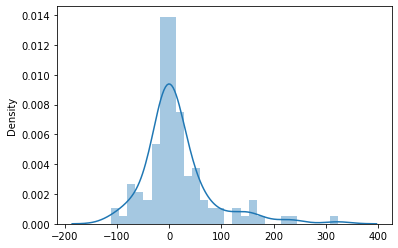

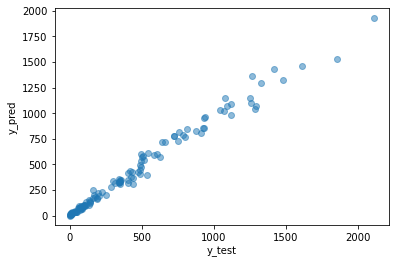

In [13]:
knn = KNeighborsRegressor(n_neighbors = 8)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)

print("KNN r2 Score on Training set is",round(knn.score(X_train, y_train)*100,2))
print("KNN r2 Score on Test Set is",round(knn.score(X_test, y_test)*100,2))

accuracies = cross_val_score(knn, X_train, y_train, cv = 5)
print(accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

mae=mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:" , mae)

mse=mean_squared_error(y_test, y_pred)
print("Mean Squared Error:" , mse)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

sns.distplot(y_test-y_pred)
plt.show()

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [14]:
test_vs_pred = pd.DataFrame({'Actual Points': y_test.tolist(), 'Predicted Points': y_pred.tolist()})
test_vs_pred

,Actual Points,Predicted Points
0,587,587.625
1,89,90.500
2,350,334.875
3,1417,1432.125
4,1071,1023.625
...,...,...
116,1295,1070.250
117,799,766.250
118,346,350.375
119,930,859.000
